In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score

In [120]:
df = pd.read_excel('dataset(column duplication app, version.alireza).xls')
initial_pain = df['Pain Level - Initial']
onehr_pain = df['Pain Level - After 1 hour']
y = np.zeros((df.shape[0],))
X = np.zeros((df.shape[0],2))
for i in range(len(X)):
    if type(onehr_pain[i]) == str:
        onehr_pain[i] = 0
    y[i] = abs(initial_pain[i] - onehr_pain[i])
    X[i,0], X[i,1] = initial_pain[i], onehr_pain[i]
y[np.isnan(y)] = 0.0
X[np.isnan(X)] = 0.0
sc = StandardScaler()
X = sc.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [121]:
def getScore(clf, X, y):
    skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=10)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test) * 10.0)
    return round(sum(scores), 2)

In [172]:
def plotAccuracy(acc1, acc2, acc3):
    colors = ['blue', 'red', 'green']
    labels = ['Model Accuracy', 'f1 score', 'Stratified 10-Fold']
    index = np.arange(len(labels))
    plotter = plt.bar(index, [acc1, acc2, acc3])
    plotter[0].set_color('r'), plotter[1].set_color('b'), plotter[2].set_color('y')
    plt.xlabel('Algorithms', fontsize=10)
    plt.ylabel('Algorithms\'s Scores', fontsize=10)
    plt.xticks(index, labels, fontsize=10, rotation=30)
    plt.ylim((0, 100))
    plt.title('Accuracy Scores')
    plt.legend((plotter[0], plotter[1], plotter[2]), (acc1, acc2, acc3))
    plt.savefig('Accuracy Scores', dpi=300)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


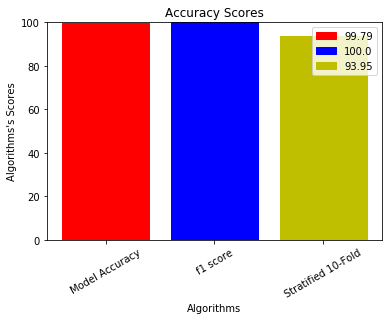

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3, stratify=y)
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
y_pred = np.rint(lr_model.predict(X_test))
score = round(lr_model.score(X_test, y_test)*100,2)
f1 = round(f1_score(y_test, y_pred, average='micro')*100,2)
stratified_score = getScore(lr_model, X, y)
plotAccuracy(score, f1, stratified_score)